In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Jash1005/MACHINE-LEARNING/refs/heads/main/KNN/breast-cancer.csv')

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
df = df.drop('id',axis=1)

In [5]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)

In [7]:
X_train.shape

(455, 30)

In [8]:
# some col have data in scale of 10 and some have in scale in 0.1
# advisable to make it in same scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5);

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
r1 = accuracy_score(y_test,y_pred);

print(r1)

0.9736842105263158


# How to find value of K ? => Cross Validation

In [12]:
scores = []

for i in range(1,16) :

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))

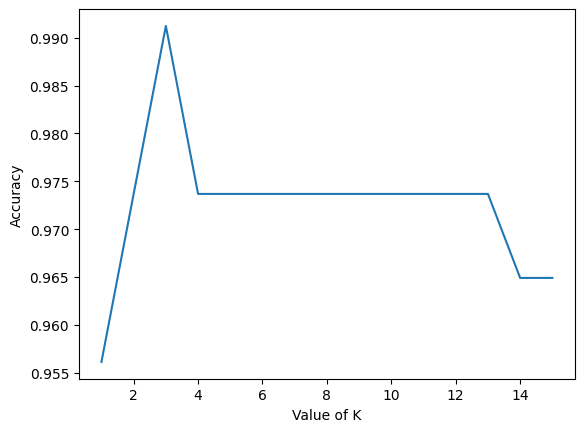

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

In [14]:
knn_new = KNeighborsClassifier(n_neighbors=3);

knn_new.fit(X_train,y_train)
y_pred = knn_new.predict(X_test)
r2 = accuracy_score(y_test,y_pred);

print(r2)


0.9912280701754386


In K-Nearest Neighbors (KNN), overfitting and underfitting are influenced by the choice of **K**, the number of neighbors. When **K is too small** (e.g., K=1), the model becomes overly sensitive to noise and memorizes the training data, leading to **overfitting**—high accuracy on training data but poor generalization to new data. Conversely, when **K is too large**, the model becomes too simplistic, averaging over many points (possibly from different classes), which causes **underfitting**—poor performance on both training and test data. Choosing the right K using techniques like cross-validation helps strike a balance between bias and variance for optimal performance.


Failure Case



*   Large dataset
*   high dimension data -> curse of dimensionality. using euclidean distance is high dimension is not preferable


*   Outlier
*   Imbalance dataset -> 98% yes 2% no
* here we can't say whether output depends more on cgpa or more on iq



